In [4]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import cumulative_trapezoid
from tabulate import tabulate
import matplotlib
import piecewise_regression
import json

In [5]:
def mean(arr):
    return np.mean(arr)

def error(x):
    return x.std() / np.sqrt(x.size)

def weighted_error(x, err):
    
    x = np.asarray(x)
    err = np.asarray(err)
    
    average = np.sum(x/(err**2))/np.sum(1/err**2)
    
    average_error = 1/np.sqrt(np.sum(1/err**2))
    
    return average, average_error

def decimal(x):
    return x.replace(',', '.').encode()

def sum_err(x,sx):
    return np.sum(x),np.sqrt(np.sum([np.sum(i**2) for i in sx])) 

def diff_err(x,sx):
    return x[0]-x[1],np.sqrt(np.sum([np.sum(i**2) for i in sx])) 

def times_err(x,sx):
    return np.prod(x), np.prod(x)*np.sqrt(np.sum([np.sum((i/j)**2) for i,j in zip(sx,x)]))

#def frac_err(x,sx):
#    return x[0]/x[1], x[0]/x[1]*np.sqrt(np.sum((sx/x)**2))

def frac_err(x,sx):
    return x[0]/x[1], x[0]/x[1]*np.sqrt(np.sum([np.sum((i/j)**2) for i,j in zip(sx,x)]))
    #return [np.sum((i/j)**2) for i,j in zip(sx,x)]

In [6]:
def lst_sqrs(x,y,sx,sy):
    
    x_ = mean(x)
    y_ = mean(y)
    xy_ = mean(x*y)
    x_y_ = x_ * y_
    xx_ = mean(x**2)
    x_x_ = x_**2
    
    #a = (mean(x*y) - mean(x) * mean(y))/(mean(x**2)-mean(x)**2)
    #b = (mean(x**2)*mean(y) - mean(x) * mean(x*y))/(mean(x**2)-mean(x)**2)
    
    a = (xy_ - x_y_)/(xx_ - x_x_)
    b = (xx_*y_ - x_*xy_)/(xx_ - x_x_)
    
    sx_ = np.sqrt(np.sum(sx**2))/x.size
    sy_ = np.sqrt(np.sum(sy**2))/x.size
    sxy = np.sqrt(np.sum(x**2*sy**2 + y**2*sx**2))/x.size
    sxx = np.sqrt(np.sum(4*x**2*sx**2))/x.size
    #sxx = sx_
    
    sxsy = times_err([x_,y_],[sx_,sy_])[1]
    sxsx = times_err([x_,x_],[sx_,sx_])[1]
    #sxsx = sx_
    
    '''print('x_  : {} +- {}'.format(x_,sx_))
    print('y_  : {} +- {}'.format(y_,sy_))
    print('xy_ : {} +- {}'.format(xy_,sxy))
    print('x_y_: {} +- {}'.format(x_y_,sxsy))
    print('xx_ : {} +- {}'.format(xx_,sxx))
    print('x_x_: {} +- {}'.format(x_x_,sxsx))'''
    
    
    sxxsy = times_err([xx_,y_],[sxx,sy_])[1]
    sxsxy = times_err([x_,xy_],[sx_,sxy])[1]
    
    
    a_u = diff_err([xy_,x_y_],[sxy,sxsy])
    a_d = diff_err([xx_,x_x_],[sxx,sxsx])
    b_u = diff_err([xx_*y_,x_*xy_],[sxxsy,sxsxy])
    
    sa = frac_err([xy_ - x_y_, xx_ - x_x_],[a_u[1],a_d[1]])
    sb = frac_err([xx_*y_ - x_*xy_, xx_ - x_x_],[b_u[1],a_d[1]])
    
    return [a,b],[sa,sb]

In [160]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

# **UKOL 1**

## DATA

In [110]:
m = 100.5 ## +- 0.5g
g = np.array([m*(i+1) for i in range(5)])
g_err = np.array([np.sqrt((i+1)*0.5**2) for i in range (5)])

F1 = g*9.81/1000 
sF1 = g_err*9.81/1000

l1 = 96.1*10 ## +- 0.5cm  DELKA STRUNY
sl1 = 0.5*10
d1 = 0.255 ## +- 0.01mm PRUMER STRUNY
sd1 = 0.01 

dl1 = np.array([0.11,0.2,0.305,0.45,0.53])
dl2 = np.array([0.14,0.235,0.34,0.445,0.55])
sdl1 = np.full(5, 0.01)
sdl2 = np.full(5, 0.01)

S1 = np.pi*(d1/2)**2
sS1 = 2*np.pi*d1/2*sd1


y1, sy1 = frac_err([dl1,l1],[sdl1,sl1])
y2, sy2 = frac_err([dl2,l1],[sdl2,sl1])
 
    
x1, sx1 = frac_err([F1,S1],[sF1,sS1])

#print('{}+-{}'.format(S1,sS1))
print('------------------------------------------------------------------')
print(x1)
print(sx1)
print('------------------------------------------------------------------')
print(y1)
print(sy1)
print('------------------------------------------------------------------')
print('------------------------------------------------------------------')
print(y2)
print(sy2)

0.051070515574919075+-0.008011061266653973
------------------------------------------------------------------
[19.30477868 38.60955735 57.91433603 77.2191147  96.52389338]
[ 3.03167628  6.06335257  9.09502885 12.12670513 15.15838141]
------------------------------------------------------------------
[0.00011446 0.00020812 0.00031738 0.00046826 0.00055151]
[1.29077439e-05 2.34686253e-05 3.57896536e-05 5.28044070e-05
 6.21918571e-05]
------------------------------------------------------------------
------------------------------------------------------------------
[0.00014568 0.00024454 0.0003538  0.00046306 0.00057232]
[1.35417298e-05 2.27307608e-05 3.28870582e-05 4.30433556e-05
 5.31996530e-05]


## FIT

In [381]:
eps = dl1/l1


[a1,b1],[sa1,sb1] = lst_sqrs(x1,y1,sx1,sy1)
[a2,b2],[sa2,sb2] = lst_sqrs(x1,y2,sx1,sy2)
#a1,b1 = pars
#sa1,sb1 = err


print("a1: {} +- {}".format(a1,sa1))
print("b1: {} +- {}".format(b1,sb1))
print('------------------------------------------------------------------')
print("a2: {} +- {}".format(a2,sa2))
print("b2: {} +- {}".format(b2,sb2))

a1: 5.8754114241969805e-06 +- (5.8754114241969805e-06, 7.753061176834364e-06)
b1: -8.324661810613768e-06 +- (-8.324661810613768e-06, -0.0004222688697804797)
------------------------------------------------------------------
a2: 5.551994281580636e-06 +- (5.551994281580636e-06, 7.422245480769179e-06)
b2: 3.4339229968782276e-05 +- (3.4339229968782276e-05, 0.0004391381795920088)


In [391]:
print(1/a1)
print(1/a2)

print("E1: {} +- {}".format(1/(1000*a1),1/(28431*a1)))
print("E2: {} +- {}".format(1/(1000*a2),1/(18431*a2)))

170200.8468516185
180115.45928957674
E1: 170.2008468516185 +- 5.9864530565797365
E2: 180.11545928957673 +- 9.772419255036446


## GRAF

C:\Users\stepa\AppData\Local\Temp/ipykernel_1756/2907878008.py:16: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


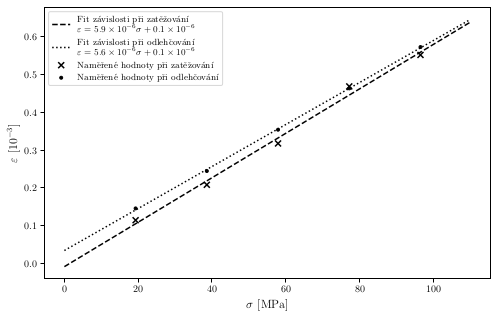

In [194]:
x_range = np.linspace(0,110,250)
plt.figure(figsize = (8,5))

plt.scatter(x1,y1*1000, marker = 'x', color = "k", label = "Naměřené hodnoty při zatěžování")
plt.scatter(x1,y2*1000, marker = '.', color = "k", label = "Naměřené hodnoty při odlehčování")
plt.plot(x_range, (a1*x_range+b1)*1000,linestyle = 'dashed', color = 'k', label = "Fit závislosti při zatěžování \n" + r"$\varepsilon = 5.9 \times 10^{-6} \sigma + 0.1 \times 10^{-6}$")
plt.plot(x_range, (a2*x_range+b2)*1000,linestyle = 'dotted', color = 'k', label = "Fit závislosti při odlehčování \n" + r"$\varepsilon = 5.6 \times 10^{-6} \sigma + 0.1 \times 10^{-6}$")

plt.legend(loc='upper left', fontsize=9)

plt.ylabel(r"$ \varepsilon$  [$10^{-3}$]", fontsize=12)
plt.xlabel(r"$ \sigma$ [MPa]", fontsize=12)

plt.savefig('ukol1.pdf', bbox_inches = 'tight')

plt.show()

## TABULKA

In [380]:
T = np.array([g, dl1.round(2),x1.round(0), sx1.round(0) ,(y1*1000).round(2),(sy1*1000).round(2)]).T 

print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rrrrrr}
\toprule
   0   & 0.11 & 19 &  3 & 0.11 & 0.01 \\
 100.5 & 0.2  & 39 &  6 & 0.21 & 0.02 \\
 201   & 0.3  & 58 &  9 & 0.32 & 0.04 \\
 301.5 & 0.45 & 77 & 12 & 0.47 & 0.05 \\
 402   & 0.53 & 97 & 15 & 0.55 & 0.06 \\
\bottomrule
\end{tabular}


In [379]:
T = np.array([g, dl2.round(2),x1.round(0), sx1.round(0) ,(y2*1000).round(2),(sy2*1000).round(2)]).T

print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rrrrrr}
\toprule
   0   & 0.14 & 19 &  3 & 0.15 & 0.01 \\
 100.5 & 0.24 & 39 &  6 & 0.24 & 0.02 \\
 201   & 0.34 & 58 &  9 & 0.35 & 0.03 \\
 301.5 & 0.44 & 77 & 12 & 0.46 & 0.04 \\
 402   & 0.55 & 97 & 15 & 0.57 & 0.05 \\
\bottomrule
\end{tabular}


# **UKOL 2**

## Data

In [393]:
m = 100.5 ## +- 0.5g
g = np.array([m*(i) for i in range(6)])
g_err = np.array([np.sqrt((i)*0.5**2) for i in range (6)])

F = g*9.81/1000 
sF = g_err*9.81/1000

L = 57*10 ## +- 1cm  DELKA NOSNIKU
sL = 1*10
b = 9.99 #sirka nosniku
a = 4 #vyska nosniku
sa = 0.01
sb = 0.01

z1 = (np.array([4.75,6.6,8.1,9.8,11.5,13.2]) - np.full(6,4.75))*0.0253
z2 = (np.array([0.05,1.7,3.4,5.05,6.75,8.35]) + np.full(6,0.1))*0.0253
sz1 = np.full(6, 0.15*0.0253)
sz2 = np.full(6, 0.15*0.0253)


print('------------------------------------------------------------------')
print(z1)
print(z2)
print('------------------------------------------------------------------')

------------------------------------------------------------------
[0.       0.046805 0.084755 0.127765 0.170775 0.213785]
[0.003795 0.04554  0.08855  0.130295 0.173305 0.213785]
------------------------------------------------------------------


## FIT

In [270]:

[k1,q1],[sk1,sq1] = lst_sqrs(F,z1,sF,sz1)
[k2,q2],[sk2,sq2] = lst_sqrs(F,z2,sF,sz2)
#a1,b1 = pars
#sa1,sb1 = err


print("k1: {} +- {}".format(k1,sk1[1])) ##################### 10^-3 m/N
print("q1: {} +- {}".format(q1,sq1[1]))
print('------------------------------------------------------------------')
print("k2: {} +- {}".format(k2,sk2[1]))
print("q2: {} +- {}".format(q2,sq2[1]))

k1: 0.04300168010971791 +- 0.0021647889840318746
q1: 0.0013252380952381022 +- 0.006411438768249774
------------------------------------------------------------------
k2: 0.04274506309286538 +- 0.0021645881392739746
q2: 0.0038552380952379876 +- 0.006414418525918627


In [256]:
print(1/k1)
print(1/k2)

23.254905330408498
23.394514539081612


## GRAF

C:\Users\stepa\AppData\Local\Temp/ipykernel_1756/3994227460.py:16: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


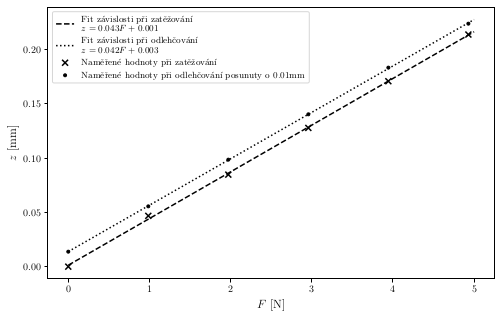

In [397]:
x_range = np.linspace(0,5,250)
plt.figure(figsize = (8,5))

plt.scatter(F,z1, marker = 'x', color = "k", label = "Naměřené hodnoty při zatěžování")
plt.scatter(F,z2+0.01, marker = '.', color = "k", label = "Naměřené hodnoty při odlehčování posunuty o 0.01mm")
plt.plot(x_range, (k1*x_range+q1),linestyle = 'dashed', color = 'k', label = "Fit závislosti při zatěžování \n" + r"$z = 0.043 F + 0.001$")
plt.plot(x_range, (k2*x_range+q2)+0.01,linestyle = 'dotted', color = 'k', label = "Fit závislosti při odlehčování \n" + r"$z = 0.042 F + 0.003$")

plt.legend(loc='upper left', fontsize=9)

plt.ylabel(r"$z$  [mm]", fontsize=12)
plt.xlabel(r"$F$ [N]", fontsize=12)

plt.savefig('ukol2.pdf', bbox_inches = 'tight')

plt.show()

## VYPOCET E

In [268]:
E1 = 10**6*L**3/(4*a*b**3*k1) #####   GPa
E2 = 10**6*L**3/(4*a*b**3*k2)
sE1 = frac_err([10**6*L**3,4*a*b**3*k1],[10**6*times_err([L,L,L],[sL,sL,sL])[1] , times_err([4*a,b,b,b,k1],[4*sa,sb,sb,sb,sk1[1]])[1]]) 
sE2 = frac_err([10**6*L**3,4*a*b**3*k2],[10**6*times_err([L,L,L],[sL,sL,sL])[1] , times_err([4*a,b,b,b,k2],[4*sa,sb,sb,sb,sk2[1]])[1]]) 

print('E1: {} +- {}'.format(E1/10**9,sE1[1]/10**9))
print('E2: {} +- {}'.format(E2/10**9,sE2[1]/10**9))

E1: 269.9744689317592 +- 15.896270668384982
E2: 271.5952419013323 +- 16.06084579090225


## TABULKA

In [395]:
T = np.array([g,F.round(3),sF.round(3), z1.round(3), sz1.round(3)]).T

print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rrrrr}
\toprule
   0   & 0     & 0     & 0     & 0.004 \\
 100.5 & 0.986 & 0.005 & 0.047 & 0.004 \\
 201   & 1.972 & 0.007 & 0.085 & 0.004 \\
 301.5 & 2.958 & 0.008 & 0.128 & 0.004 \\
 402   & 3.944 & 0.01  & 0.171 & 0.004 \\
 502.5 & 4.93  & 0.011 & 0.214 & 0.004 \\
\bottomrule
\end{tabular}


In [396]:
T = np.array([g,F.round(3),sF.round(3), z2.round(3), sz2.round(3)]).T

print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rrrrr}
\toprule
   0   & 0     & 0     & 0.004 & 0.004 \\
 100.5 & 0.986 & 0.005 & 0.046 & 0.004 \\
 201   & 1.972 & 0.007 & 0.089 & 0.004 \\
 301.5 & 2.958 & 0.008 & 0.13  & 0.004 \\
 402   & 3.944 & 0.01  & 0.173 & 0.004 \\
 502.5 & 4.93  & 0.011 & 0.214 & 0.004 \\
\bottomrule
\end{tabular}


# **UKOL 3**

## Data

In [20]:
m = 100.5 ## +- 0.5g
g = np.array([m*(i) for i in range(5)])
g_err = np.array([np.sqrt((i)*0.5**2) for i in range (5)])

d = 44.8/1000
sd = 0.1/1000
M = d*g*9.81/1000 
sM = sd * g *9.81/1000

L2 = 69.1*10/1000
sL2 = 1*10/1000
R = 1.995/1000
sR = 0.01/1000

phi1 = np.array([172,183.5,193,204.5,214])
phi2 = np.array([173.5,186.5,197,203.5,214])
sphi1 = np.full(5, 0.1)
sphi2 = np.full(5, 0.1)


print('------------------------------------------------------------------')
print(phi1)
print(phi2)
print('------------------------------------------------------------------')
print(M)
print(sM)

------------------------------------------------------------------
[172.  183.5 193.  204.5 214. ]
[173.5 186.5 197.  203.5 214. ]
------------------------------------------------------------------
[0.         0.04416854 0.08833709 0.13250563 0.17667418]
[0.000000e+00 9.859050e-05 1.971810e-04 2.957715e-04 3.943620e-04]


## FIT

In [21]:

[m1,n1],[sm1,sn1] = lst_sqrs(M,phi1,sM,sphi1)
[m2,n2],[sm2,sn2] = lst_sqrs(M,phi2,sM,sphi2)
#a1,b1 = pars
#sa1,sb1 = err


print("m1: {} +- {}".format(m1,sm1[1])) ##################### 10^-3 m/N
print("n1: {} +- {}".format(n1,sn1[1]))
print('------------------------------------------------------------------')
print("m2: {} +- {}".format(m2,sm2[1]))
print("n2: {} +- {}".format(n2,sn2[1]))

m1: 237.72574436685156 +- 8.29917317035752
n1: 172.39999999999998 +- 2.3721804423400035
------------------------------------------------------------------
m2: 221.8773614090606 +- 8.29550986397586
n2: 175.3 +- 2.3987949382163225


In [22]:
print(1/m1)
print(1/m2)

0.004206527999999986
0.0045069942857142884


## GRAF

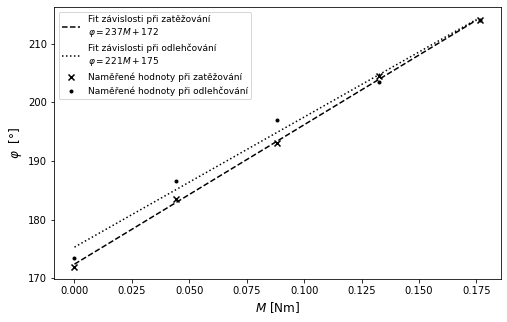

In [23]:
x_range = np.linspace(0,0.175,250)
plt.figure(figsize = (8,5))

plt.scatter(M,phi1, marker = 'x', color = "k", label = "Naměřené hodnoty při zatěžování")
plt.scatter(M,phi2, marker = '.', color = "k", label = "Naměřené hodnoty při odlehčování")
plt.plot(x_range, (m1*x_range+n1),linestyle = 'dashed', color = 'k', label = "Fit závislosti při zatěžování \n" + r"$\varphi = 237 M + 172$")
plt.plot(x_range, (m2*x_range+n2),linestyle = 'dotted', color = 'k', label = "Fit závislosti při odlehčování \n" + r"$\varphi = 221 M + 175$")

plt.legend(loc='upper left', fontsize=9)

plt.ylabel(r"$\varphi$  [°]", fontsize=12)
plt.xlabel(r"$M$ [Nm]", fontsize=12)

plt.savefig('ukol3.pdf', bbox_inches = 'tight')

plt.show()

## VYPOCET G

In [26]:
G1 = 2*L2/(np.pi*m1*R**4) 
G2 = 2*L2/(np.pi*m2*R**4)
sG1 = frac_err([2*L2,np.pi*m1*R**4],[2*sL2 , times_err([np.pi*m1,R,R,R,R],[np.pi*sm1[1],sR,sR,sR,sR])[1]]) 
sG2 = frac_err([2*L2,np.pi*m2*R**4],[2*sL2 , times_err([np.pi*m2,R,R,R,R],[np.pi*sm2[1],sR,sR,sR,sR])[1]]) 

print('G1: {} +- {}'.format(G1/10**6,sG1[1]/10**6)) ########### MPa
print('G2: {} +- {}'.format(G2/10**6,sG2[1]/10**6))

G1: 116.81815809611246 +- 4.567413069507389
G2: 125.16231224583524 +- 5.172374085439229


## TABULKA

In [307]:
T = np.array([g,M.round(1),sM.round(1), phi1.round(1), sphi1.round(1)]).T

print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rrrrr}
\toprule
   0   &   0   & 0   & 172   & 0.1 \\
 100.5 &  44.2 & 0.1 & 183.5 & 0.1 \\
 201   &  88.3 & 0.2 & 193   & 0.1 \\
 301.5 & 132.5 & 0.3 & 204.5 & 0.1 \\
 402   & 176.7 & 0.4 & 214   & 0.1 \\
\bottomrule
\end{tabular}


In [308]:
T = np.array([g,M.round(1),sM.round(1), phi2.round(1), sphi2.round(1)]).T

print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rrrrr}
\toprule
   0   &   0   & 0   & 173.5 & 0.1 \\
 100.5 &  44.2 & 0.1 & 186.5 & 0.1 \\
 201   &  88.3 & 0.2 & 197   & 0.1 \\
 301.5 & 132.5 & 0.3 & 203.5 & 0.1 \\
 402   & 176.7 & 0.4 & 214   & 0.1 \\
\bottomrule
\end{tabular}


# **UKOL 4**

## Data

In [42]:
m3 = 127.2/1000
sm3 = 0.3/1000
ri = 0.615/100
ro = 4.98/100
h = 0.815/100
sri = 0.01/100
sro = 0.01/100
sh = 0.01/100

a1 = 10.84/100
a2 = 8.55/100
sa1 = 0.1/100
sa2 = 0.1/100

L3 = 37.6/100
sL3 = 1/100
R3 = 0.32/1000 ### mm
sR3 = 0.01/1000

T1raw = np.array([19.58,19.21,20.53,21,19.9])
T2raw = np.array([15.5,15.57,15.4,16.1,16.17])
T1 = mean(T1raw)
T2 = mean(T2raw)
sT1 = error(T1raw)
sT2 = error(T2raw)


print('------------------------------------------------------------------')
print(T1, ' +- ', sT1)
print(T2, ' +- ', sT2)
print('------------------------------------------------------------------')


------------------------------------------------------------------
20.044  +-  0.28856333793467265
15.748000000000001  +-  0.14370525390534641
------------------------------------------------------------------


## VYPOCET I0

In [34]:
Iv = m3*(ri**2 + ro**2 + h**2/3)/4
sIv = times_err([m3/4, (ri**2 + ro**2 + h**2/3)],[sm3/4, 2*np.sqrt(ro**2*sro**2 + ri**2*sri**2 + h**2*sh/9)])[1]

print('Iv: {} +- {}'.format(Iv,sIv))

Iv: 8.077210600000002e-05 +- 1.7673227538370183e-06


In [35]:
Ia1 = 2*Iv + 2*m3*a1**2
Ia2 = 2*Iv + 2*m3*a2**2
sIa1 = sum_err([2*Iv,2*m3*a1**2],[2*sIv,times_err([2*m3,a1,a1],[2*sm3,sa1,sa1])[1]])[1]
sIa2 = sum_err([2*Iv,2*m3*a2**2],[2*sIv,times_err([2*m3,a2,a2],[2*sm3,sa2,sa2])[1]])[1]

print('Ia1: {} +- {}'.format(Ia1,sIa1))
print('Ia2: {} +- {}'.format(Ia2,sIa2))

Ia1: 0.0031508866759999998 +- 3.9789174435529777e-05
Ia2: 0.002021271812 +- 3.1272374926881074e-05


In [36]:
I0 = -(T1**2 * Ia2 - T2**2 * Ia1)/(T2**2 - T1**2)
sI0 = -frac_err([(T1**2 * Ia2 - T2**2 * Ia1),(T2**2 - T1**2)],[np.sqrt(times_err([T1,T1,Ia2],[sT1,sT1,sIa2])[1]+times_err([T2,T2,Ia1],[sT2,sT2,sIa1])[1]),2*np.sqrt(T2**2*sT2**2 + T1**2*sT1**2)])[1]

print('I0: {} +- {}'.format(I0,sI0))

I0: 0.00019934481501397808 +- 0.0012146273757025162


In [51]:
I1 = I0 + Ia1
sI1 = np.sqrt(I0**2 + sIa1**2)
I2 = I0 + Ia2
sI2 = np.sqrt(I0**2 + sIa2**2)
print(I1*10**7,I2*10**7)
print(sI1*10**7,sI2*10**7)

33502.31491013978 22206.16627013978
2032.7698756922327 2017.8284542181618


In [49]:
K1 = 4*np.pi**2*I1/(T1**2)
sK1 = frac_err([4*np.pi**2*I1, T1**2],[4*np.pi**2*sI1,2*sT1*T1])[1]
K2 = 4*np.pi**2*I2/T2**2
sK2 = frac_err([4*np.pi**2*I2, T2**2],[4*np.pi**2*sI2,2*sT2*T2])[1]
print(K1*10**7,sK1)
print(K2*10**7,sK2)

3292.0450152728968 2.210958885964638e-05
3534.9437852277897 3.276278123328511e-05


In [45]:
G1 = 2*L3*K1/(np.pi*R3**4) 
G2 = 2*L3*K2/(np.pi*R3**4)
sG1 = frac_err([2*L3*K1,np.pi*R3**4],[2*sL3 + sK1 , np.pi*2*times_err([R3,R3,R3,R3],[sR3,sR3,sR3,sR3])[1]]) 
sG2 = frac_err([2*L3*K2,np.pi*R3**4],[2*sL3 + sK2, np.pi*2*times_err([R3,R3,R3,R3],[sR3,sR3,sR3,sR3])[1]]) 

print('G1: {} +- {}'.format(G1/10**9,sG1[1]/10**9)) ########### MPa
print('G2: {} +- {}'.format(G2/10**9,sG2[1]/10**9))

G1: 7.515083661468697 +- 607.7998195994315
G2: 8.069573217051989 +- 608.1233227599436


## TABULKA

In [376]:
T = np.array([T1raw.round(1),T2raw.round(1)]).T

print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rr}
\toprule
 19.6 & 15.5 \\
 19.2 & 15.6 \\
 20.5 & 15.4 \\
 21   & 16.1 \\
 19.9 & 16.2 \\
\bottomrule
\end{tabular}
